# 가구원형태

In [231]:
import pandas as pd
import matplotlib as plt
from plotnine import *


In [100]:
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=15).get_name()
plt.rc('font', family=font_name)         

In [232]:
%pwd

'C:\\Users\\lunar\\Desktop\\whos_next_rookie\\code\\seoul_populations'

In [233]:
def str_to_float(x):
    try:
        return float(x.replace(',',''))
    except:
        return x
    

In [234]:
df_2010 = pd.read_csv('data/2010_household.csv', encoding='euc-kr').copy()
df_2010.head()
df_2010 = df_2010[df_2010.iloc[:,2] !='소계']

df_2010.columns=df_2010.iloc[0,:]

columns = ['계','1인가구','2인가구','3인가구','4인가구','5인가구','6인이상가구']
for column in columns:
    df_2010[column] = df_2010[column].apply(lambda x:str_to_float(x))
df_2010 = df_2010.drop(0)

In [ ]:
aperson_2010 = df_2010.sort_values(by=['1인가구'], ascending=False).head(20)

In [128]:
fam_2010 = df_2010.sort_values(by=['4인가구','5인가구'],ascending=False).head(20)

In [235]:
df_2015 = pd.read_csv('data/2015_household.csv', encoding='euc-kr').copy()

df_2015 = df_2015[df_2015.iloc[:,2] !='소계']

df_2015.columns=df_2015.iloc[0,:]

columns = ['계','1인가구','2인가구','3인가구','4인가구','5인가구','6인가구','7인이상 가구']
for column in columns:
    df_2015[column] = df_2015[column].apply(lambda x:str_to_float(x))
df_2015 = df_2015.drop(0)

In [236]:
df_2015 = df_2015.replace('X' ,0)
df_2015 = df_2015.fillna(0)


In [237]:
df_2015 = df_2015.rename({'6인가구': '6인이상가구'},axis =1)
df_2015['6인이상가구'] = df_2015['6인이상가구'] + df_2015['7인이상 가구']
df_2015 = df_2015.drop('7인이상 가구', axis = 1)

In [130]:
fam_2015 = df_2015.sort_values(by=['4인가구','5인가구'],ascending=False).head(20)
fam_2015.head()

,기간,자치구,동,계,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상 가구
1,2015,합계,합계,3.78449e+06,1.11574e+06,930467,817440,701945,169436,38547,10911
202,2015,은평구,진관동,16259,2197,3455,3935,4759,1489,332,92
255,2015,양천구,목5동,12863,1065,2202,3876,4701,865,130,24
252,2015,양천구,신정3동,18767,3883,4326,4651,4449,1173,220,65
277,2015,강서구,우장산동,14912,2273,3241,4012,4272,892,179,43


In [238]:
household = pd.concat([df_2010,df_2015])
print(household.tail())
household.to_csv('household.csv', encoding='utf-8')

0      기간  자치구     동      계  1인가구  2인가구  3인가구  4인가구 5인가구 6인이상가구
447  2015  강동구  둔촌2동   9839  1957  2317  2510  2370  541    144
448  2015  강동구  암사1동  14086  3966  3543  3150  2619  614    194
449  2015  강동구  천호2동  14853  5212  3940  2825  2211  497    168
450  2015  강동구    길동  19039  5141  4738  4335  3713  859    253
451     0    0     0      0     0     0     0     0    0      0


In [239]:
household.tail()

,기간,자치구,동,계,1인가구,2인가구,3인가구,4인가구,5인가구,6인이상가구
447,2015,강동구,둔촌2동,9839,1957,2317,2510,2370,541,144
448,2015,강동구,암사1동,14086,3966,3543,3150,2619,614,194
449,2015,강동구,천호2동,14853,5212,3940,2825,2211,497,168
450,2015,강동구,길동,19039,5141,4738,4335,3713,859,253
451,0,0,0,0,0,0,0,0,0,0


In [240]:

columns = ['계','1인가구','2인가구','3인가구','4인가구','5인가구','6인이상가구']
for column in columns:
    household[column] = household[column].apply(lambda x:str_to_float(x))
household= household.drop(451)

# 전체가구수 

In [241]:
household[household['동'].str.contains('합계',regex=True)]

,기간,자치구,동,계,1인가구,2인가구,3인가구,4인가구,5인가구,6인이상가구
1,2010,합계,합계,3504297.0,854606.0,781527.0,788115.0,807836.0,209061.0,63152.0
1,2015,합계,합계,3784490.0,1115744.0,930467.0,817440.0,701945.0,169436.0,49458.0


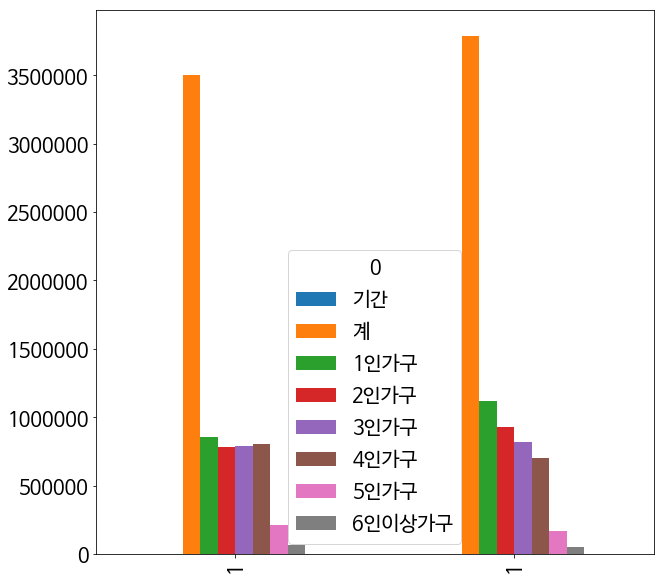

In [242]:
gross.plot.bar()

서울시 전체 가구수는 2010년 대비 2015년 늘어났다. 1인가구가  약 30만가구 증가했으며 2인가구와 3인가구도 증가추세를 보였다. 대체로 4,5,6인가구는 감소하는 추세를 보인다. 

# 동별 가구원수별 가구수 

2010년대비 2015년 1인가구가 많은 거주지역과 4,5,6인가구가 많은 거주지역을 비교해보고자 한다. 
1. 가구원수별로 주거형태가 다를것이다.
아파트 밀집지역, 단독주택, 사글세 등 상권발달에 영향을 미치는 지역의 주거양상을 비교해볼 수 있을 것.

2. 취약계층의 주거이전 양상.
가구원수 구성에서 여성가구주는 1인가구주가 49%로 가장 높은 반면, 남성가구주는 4인가구가 36.5%로 가장 높다.  
여성가구주 중 취업을 한 경우(’09년 기준)는 58.4%로 남성가구주 중 취업을 한 경우(85.3%)에 비해 낮다. 
1인가구주는 4인가구주에 비해 취약계층이 많아 다양한 통계 분석이 시도되고 있다. 동별로 가구원수를 비교해봄으로써
주거이전이 어느 집단에서 많이 일어나는지 찾아볼 것이다. (우선, 전체적인 가구원수를 비교해본 뒤, 성별, 나이로 이전해갈 수 있도록.)

In [243]:
household.head()

,기간,자치구,동,계,1인가구,2인가구,3인가구,4인가구,5인가구,6인이상가구
1,2010,합계,합계,3504297.0,854606.0,781527.0,788115.0,807836.0,209061.0,63152.0
3,2010,종로구,사직동,3442.0,1033.0,865.0,720.0,585.0,180.0,59.0
4,2010,종로구,삼청동,1048.0,271.0,263.0,219.0,168.0,86.0,41.0
5,2010,종로구,부암동,3424.0,693.0,813.0,758.0,808.0,243.0,109.0
6,2010,종로구,평창동,5758.0,918.0,1338.0,1423.0,1429.0,462.0,188.0


In [253]:
sample =household[household['동'].str.contains('연남|종로1.2.3.4가동|성수[12]가제[13]동|행운동|봉천동|망원|삼청|명동|상도|목|신정제|상계|중계|명일', regex=True)]



In [254]:
df = sample.melt(id_vars=['동','기간'],value_vars=['1인가구', '2인가구','3인가구','4인가구','5인가구','6인이상가구'])
df = df.rename({0 :'category'},axis=1)
# # df.to_csv('melt.csv',encoding="utf-8")
# df.describe()

In [255]:
df.head()

,동,기간,category,value
0,삼청동,2010,1인가구,271.0
1,종로1.2.3.4가동,2010,1인가구,1873.0
2,명동,2010,1인가구,505.0
3,면목2동,2010,1인가구,2572.0
4,면목4동,2010,1인가구,1986.0


In [258]:
df2 = df.set_index(['동','기간','category']).unstack()
df2

value                                      
category            1인가구    2인가구    3인가구    4인가구   5인가구 6인이상가구
동           기간                                                
망원1동        2010  2169.0  2173.0  1860.0  1736.0  485.0  170.0
            2015  3108.0  2453.0  1697.0  1320.0  356.0  104.0
망원2동        2010  1277.0  1625.0  1766.0  1764.0  466.0  142.0
            2015  1866.0  1942.0  1693.0  1563.0  346.0  117.0
면목2동        2010  2572.0  2368.0  2259.0  2129.0  585.0  176.0
            2015  3369.0  2745.0  2238.0  1777.0  438.0  136.0
면목3.8동      2010  2729.0  2629.0  2413.0  2298.0  486.0  169.0
            2015  3756.0  2944.0  2350.0  1817.0  398.0  157.0
면목4동        2010  1986.0  1912.0  1934.0  1724.0  466.0  147.0
            2015  2292.0  2207.0  1892.0  1425.0  366.0  113.0
면목5동        2010  1267.0  1173.0  1189.0  1030.0  284.0   90.0
            2015  1397.0  1230.0   993.0   735.0  191.0   56.0
면목7동        2010  2088.0  1970.0  2144.0  2038.0  526.0  155.0
            2015  2839.0  2401.0  1999.0  1544.0  389.0  130.0
면목본동        2010  3625.0  3284.0  2930.0  2648.0  664.0  205.0
            2015  5225.0  3793.0  2878.0  2251.0  534.0  155.0
명동          2010   505.0   205.0   118.0    88.0   36.0   17.0
            2015   657.0   257.0   158.0    93.0   19.0    5.0
명일1동        2010  1062.0  1603.0  2199.0  2839.0  694.0  156.0
            2015  1322.0  1662.0  2037.0  2061.0  449.0  130.0
명일2동        2010   403.0   802.0  1360.0  2071.0  491.0  121.0
            2015   550.0  1098.0  1471.0  1856.0  409.0   98.0
목1동         2010   855.0  1507.0  2576.0  3643.0  710.0  172.0
            2015  1121.0  1870.0  2976.0  3229.0  616.0  162.0
목2동         2010  1756.0  2075.0  2454.0  2732.0  722.0  195.0
            2015  2638.0  2778.0  2685.0  2344.0  537.0  163.0
목3동         2010  1472.0  1563.0  1913.0  1898.0  482.0  138.0
            2015  2095.0  2121.0  1966.0  1507.0  356.0   84.0
목4동         2010  1255.0  1397.0  2004.0  2886.0  706.0  197.0
            2015  1793.0  1916.0  2238.0  2513.0  584.0  140.0
...                  ...     ...     ...     ...    ...    ...
상계5동        2010  1578.0  1917.0  2033.0  2047.0  520.0  150.0
            2015  2307.0  2443.0  2153.0  1788.0  447.0  140.0
상계6.7동      2010  2696.0  2860.0  3094.0  3484.0  639.0  110.0
            2015  2814.0  3217.0  3239.0  2917.0  484.0   96.0
상계8동        2010  1182.0  2111.0  2307.0  2716.0  544.0   98.0
            2015  1349.0  2276.0  2497.0  2277.0  423.0   67.0
상계9동        2010  1179.0  1794.0  2154.0  2531.0  460.0  100.0
            2015  1297.0  2005.0  2188.0  2123.0  389.0   68.0
상도1동        2010  5599.0  3406.0  2995.0  2815.0  746.0  257.0
            2015  7160.0  4216.0  3862.0  3190.0  745.0  192.0
상도2동        2010  2437.0  2106.0  2034.0  1987.0  535.0  170.0
            2015  3390.0  2391.0  1954.0  1722.0  389.0  124.0
상도3동        2010  1926.0  1972.0  1958.0  1804.0  537.0  203.0
            2015  3017.0  2383.0  2071.0  1631.0  423.0  165.0
상도4동        2010  2023.0  2326.0  2343.0  2345.0  677.0  205.0
            2015  3075.0  2907.0  2542.0  2074.0  502.0  134.0
연남동         2010  2248.0  1883.0  1500.0  1180.0  361.0  135.0
            2015  3465.0  2084.0  1317.0   950.0  237.0   96.0
종로1.2.3.4가동 2010  1873.0   560.0   314.0   249.0   65.0   25.0
            2015  2299.0   820.0   321.0   208.0   56.0   29.0
중계1동        2010   717.0  1141.0  2132.0  3764.0  735.0  148.0
            2015   811.0  1482.0  2453.0  3319.0  603.0  102.0
중계2.3동      2010  2627.0  3529.0  3705.0  3712.0  828.0  199.0
            2015  3180.0  3980.0  3529.0  3082.0  644.0  147.0
중계4동        2010  1187.0  1645.0  1834.0  2116.0  470.0  155.0
            2015  1550.0  1986.0  1905.0  1891.0  403.0   94.0
중계본동        2010   868.0  1174.0  1980.0  3199.0  818.0  228.0
            2015  1026.0  1639.0  2168.0  2823.0  685.0  153.0
행운동         2010  6353.0  2793.0  2082.0  1753.0  471.0  144.0
            2015  7456.0  3242.0  1977.0  1511.0  

하고 싶은 일 : 
1. 동별로 가구원수별 가구수를 비율로 나타내기. 동별 가구원수의 특성을 알 수 있을 것.
2. 2010년 대비 2015년 증감률 계산. 어느 동에서 얼마나 많은 인구가 줄어들었는지 확인. 
    
    

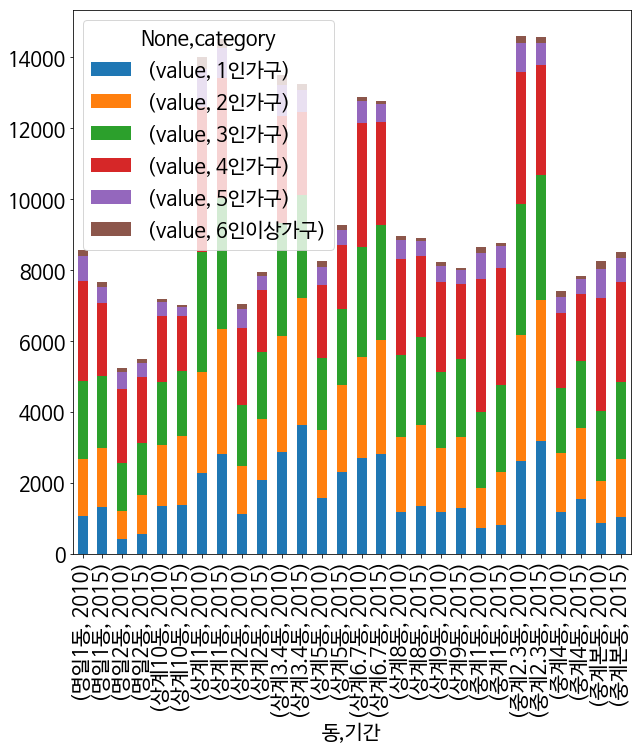

In [101]:

sample2.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [10,10]



#                  theme(text=element_text(family='NanumBarunGothic')) 


In [265]:
sample['category'] = pd.Categorical(sample['category'], categories=['1인가구', '2인가구','3인가구','4인가구','5인가구','6인이상가구'])

In [282]:
df_2010 = df_2010.dropna()

In [287]:
sample_2010 = df_2010[df_2010['동'].str.contains('연남|종로1.2.3.4가동|성수[12]가제[13]동|망원|삼청|명동|중계|명일', regex=True)]

In [288]:
sample_2010 = sample_2010.melt(id_vars=['동'],value_vars=['1인가구', '2인가구','3인가구','4인가구','5인가구','6인이상가구'])
sample_2010 = sample_2010.rename({0 :'category'},axis=1)
sample_2010['category'] = pd.Categorical(sample_2010['category'], categories=['1인가구', '2인가구','3인가구','4인가구','5인가구','6인이상가구'])

In [289]:
sample_2010.head()

,동,category,value
0,삼청동,1인가구,271
1,종로1.2.3.4가동,1인가구,1873
2,명동,1인가구,505
3,중계본동,1인가구,868
4,중계1동,1인가구,717


In [43]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9)


In [311]:
df_2015 = df_2015.dropna()
df_2015 = df_2015.melt(id_vars=['동'],value_vars=['1인가구', '2인가구','3인가구','4인가구','5인가구','6인이상가구'])
df_2015 = df_2015.rename({0 :'category'},axis=1)
df_2015['category'] = pd.Categorical(df_2015['category'], categories=['1인가구', '2인가구','3인가구','4인가구','5인가구','6인이상가구'])

In [330]:
df_2015 = df_2015[df_2015['동'] != False]

In [333]:
sample_2015 = df_2015[df_2015['동'].str.contains('연남|종로1.2.3.4가동|성수[12]가제[13]동|망원|삼청|명동|중계|명일', regex=True)]

In [64]:
ggplot(sample_2015, aes(x='동', y='value', fill='category')) + geom_col() +theme(text=element_text(family='NanumBarunGothic')) 

NameError: name 'sample_2015' is not defined

In [88]:
aperson['계'] = aperson['계'].astype('int')

In [90]:
aperson = aperson[['자치구','기간','동','계']].pivot_table(values=['계'], index=['동','자치구'],columns=['기간'])


In [107]:
aperson_df = aperson.reset_index()
aperson_df.columns = ['동', '자치구', '2010', '2015']
aperson_df.head()      

,동,자치구,2010,2015
0,가산동,금천구,NaN,10348.0
1,구로3동,구로구,12665.0,12548.0
2,노량진1동,동작구,13855.0,16295.0
3,논현1동,강남구,13261.0,12205.0
4,논현2동,강남구,10192.0,NaN


In [111]:
aperson_melt = aperson_df.melt(id_vars=['동', '자치구'], value_vars=['2010', '2015'])
aperson_melt.columns = ['동', '자치구', '연도', '인구']
aperson_melt.head()

,동,자치구,연도,인구
0,가산동,금천구,2010,NaN
1,구로3동,구로구,2010,12665.0
2,노량진1동,동작구,2010,13855.0
3,논현1동,강남구,2010,13261.0
4,논현2동,강남구,2010,10192.0


In [120]:
aperson_melt.sort_values(by='동')

,동,자치구,연도,인구
0,가산동,금천구,2010,NaN
22,가산동,금천구,2015,10348.0
1,구로3동,구로구,2010,12665.0
23,구로3동,구로구,2015,12548.0
2,노량진1동,동작구,2010,13855.0
24,노량진1동,동작구,2015,16295.0
3,논현1동,강남구,2010,13261.0
25,논현1동,강남구,2015,12205.0
4,논현2동,강남구,2010,10192.0
26,논현2동,강남구,2015,NaN


In [96]:
aperson

계           
기간               2010       2015
동     자치구                       
가산동   금천구         NaN    10348.0
구로3동  구로구     12665.0    12548.0
노량진1동 동작구     13855.0    16295.0
논현1동  강남구     13261.0    12205.0
논현2동  강남구     10192.0        NaN
대학동   관악구     15859.0    13540.0
상도1동  동작구     15818.0    19365.0
서교동   마포구     14331.0    13857.0
서림동   관악구     12955.0    12620.0
서원동   관악구     11222.0    11642.0
신림동   관악구     10403.0    12726.0
신촌동   서대문구     8889.0    11277.0
역삼1동  강남구     18924.0    18741.0
연희동   서대문구    15941.0    17270.0
용신동   동대문구        NaN    13654.0
이문1동  동대문구    14094.0    15227.0
인헌동   관악구     11882.0        NaN
청룡동   관악구     15709.0    15766.0
합계    합계    3504297.0  3784490.0
행운동   관악구     13596.0    14676.0
화곡1동  강서구     18686.0    21425.0
화양동   광진구     11981.0    15466.0

Top20 1인가구 동네를 구해보았다. 1인가구는 점점 늘어나고 있는 추세이다. 
2010대비 새로생긴 1인가구동네는 금천구 가산동과 동대문구 용신동이다. 
2015년에 사라진 1인가구동네는 강남구 논현2동과 관악구 인헌동이다. 
